In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
dataset2 = pd.read_csv('input/saved.csv')

In [20]:
dataset3 = dataset2.drop(['shop_id', 'item_id'],axis=1)

In [21]:
dataset3

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.5,1.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# X we will keep all columns execpt the last one 
X_train = np.expand_dims(dataset3.values[:,:-1],axis = 2)
# the last column is our label
y_train = dataset3.values[:,-1:]

# for test we keep all the columns execpt the first one
X_test = np.expand_dims(dataset3.values[:,1:],axis = 2)

# lets have a look on the shape 
print(X_train.shape,y_train.shape,X_test.shape)


(214200, 33, 1) (214200, 1) (214200, 33, 1)


In [23]:
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [34]:
model_lstm = Sequential()
model_lstm.add(LSTM(units = 64,input_shape = (X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(1))

model_lstm.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])
model_lstm.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [35]:
history_lstm = model_lstm.fit(X_train,y_train,batch_size = 4096,epochs = 10)

Epoch 1/10
53/53 [==============================] - 31s 581ms/step - loss: 1.3706 - mean_squared_error: 1.3706
Epoch 2/10
53/53 [==============================] - 31s 577ms/step - loss: 1.3637 - mean_squared_error: 1.3637
Epoch 3/10
53/53 [==============================] - 32s 596ms/step - loss: 1.3602 - mean_squared_error: 1.3602
Epoch 4/10
53/53 [==============================] - 30s 561ms/step - loss: 1.3554 - mean_squared_error: 1.3554
Epoch 5/10
53/53 [==============================] - 29s 551ms/step - loss: 1.3553 - mean_squared_error: 1.3553
Epoch 6/10
53/53 [==============================] - 29s 555ms/step - loss: 1.3483 - mean_squared_error: 1.3483
Epoch 7/10
53/53 [==============================] - 29s 556ms/step - loss: 1.3387 - mean_squared_error: 1.3387
Epoch 8/10
53/53 [==============================] - 32s 601ms/step - loss: 1.3247 - mean_squared_error: 1.3247
Epoch 9/10
53/53 [==============================] - 29s 546ms/step - loss: 1.3204 - mean_squared_error: 1.3204
E

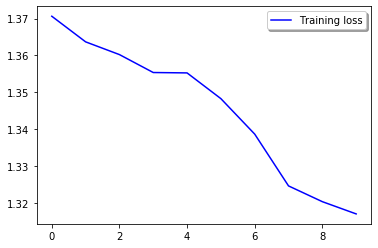

In [36]:
# Plot the loss curves for training
plt.plot(history_lstm.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

In [37]:
# creating submission file 
submission = model_lstm.predict(X_test)

In [38]:
submission = pd.DataFrame(data=submission,columns=['item_cnt_month'])

submission.reset_index(inplace=True)
submission.rename(columns={"index":"ID"},inplace=True)

In [39]:
submission.head(3)

,ID,item_cnt_month
0,0,0.397423
1,1,0.071114
2,2,0.570815


In [41]:
submission.shape, test_data.shape

((214200, 2), (214200, 3))

In [42]:
submission.to_csv('input/sub_3_lstm.csv', index=False)